In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('pdmssetw.csv')
data

,Unnamed: 0,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk
0,0,[''],[''],[''],[''],0.0
1,1,[''],[''],[''],[''],0.0
2,2,[''],[''],[''],[''],0.0
3,3,[''],[''],[''],[''],0.0
4,4,[''],[''],[''],[''],0.0
...,...,...,...,...,...,...
45537,45537,"['19:14:19', '19:14:49', '19:15:19', '19:15:49...","['', '80', '81', '76', '83', '84', '79', '88',...","['100', '100', '100', '100', '100', '100', '10...","['', '123', '', '', '', '', '', '', '', '', ''...",0.0
45538,45538,"['15:17:54', '15:18:24', '15:18:54', '15:19:00...","['67', '', '68', '68', '68', '68', '71', '67',...","['97', '98', '98', '97', '95', '91', '98', '98...","['', '', '', '', '115', '', '', '', '', '113',...",0.0
45539,45539,"['17:39:54', '17:40:24', '17:40:54', '17:41:24...","['100', '103', '97', '101', '100', '106', '107...","['99', '99', '99', '99', '99', '99', '100', '9...","['', '', '', '', '', '', '', '', '', '', '', '...",0.0
45540,45540,"['19:24:26', '19:24:56', '19:25:25', '19:25:56...","['74', '75', '75', '74', '69', '73', '73', '72...","['98', '98', '96', '96', '97', '98', '98', '98...","['178', '', '', '', '', '', '', '185', '', '',...",1.0


In [31]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk
0,[''],[''],[''],[''],0.0
1,[''],[''],[''],[''],0.0
2,[''],[''],[''],[''],0.0
3,[''],[''],[''],[''],0.0
4,[''],[''],[''],[''],0.0


In [32]:
data['IcNaOk'].sum()

3691.0

In [33]:
import ast
data.MeetTijd = data.MeetTijd.apply(ast.literal_eval)
data['HR(bpm)'] = data['HR(bpm)'].apply(ast.literal_eval)

In [34]:
data.head(10)

,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk
0,[],[],[''],[''],0.0
1,[],[],[''],[''],0.0
2,[],[],[''],[''],0.0
3,[],[],[''],[''],0.0
4,[],[],[''],[''],0.0
5,[],[],[''],[''],0.0
6,[],[],[''],[''],0.0
7,[],[],[''],[''],0.0
8,[],[],[''],[''],0.0
9,[],[],[''],[''],0.0


In [35]:
data['Length_MeetTijd'] = data['MeetTijd'].apply(lambda x: len(x))

In [36]:
data = data[data['Length_MeetTijd'] > 3]
data = data.dropna()

In [37]:
data_backup = data

In [38]:
data = data_backup

In [39]:
data = data.reset_index(drop=True)

In [40]:
data

,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk,Length_MeetTijd
0,"[15:03:40, 15:04:40, 15:05:41, 15:06:41, 15:07...","[, , , , , , , , , , , , , , , , 78, 81, 78, 8...","['', '', '', '', '', '', '', '', '', '', '', '...","['143', '143', '143', '143', '143', '143', '14...",0.0,89
1,"[15:32:32, 15:33:32, 15:34:33, 15:35:33, 15:36...","[51, 49, 57, 49, 55, 50, 56, 49, 50, 49, 54, 4...","['92', '92', '87.5', '93', '93', '93', '92', '...","['118', '118', '118', '120', '120', '120', '12...",0.0,146
2,"[08:45:22, 08:46:23, 08:47:23, 08:48:24, 08:49...","[79, 75, 71, 88, 88, 84, 66, 66, 76, 78, 79, 8...","['98', '98', '98', '', '', '96', '98', '98', '...","['129', '129', '129', '129', '', '', '', '145'...",0.0,200
3,"[08:40:08, 08:41:08, 08:42:09, 08:43:09, 08:44...","[102, 99, 99, 101, 96, 101, 99, 79, 75, 80, 76...","['93', '95.58', '96.16', '96.08', '97.83', '96...","['150', '158', '2', '151', '2', '2', '152', '1...",0.0,178
4,"[09:09:53, 09:10:53, 09:11:54, 09:12:54, 09:13...","[56, 57, 56, 58, 58, 57, 57, 63, 59, 55, 59, 5...","['97', '97', '98', '97', '98', '98', '97.5', '...","['136', '131', '131', '131', '131', '131', '14...",0.0,75
...,...,...,...,...,...,...
12732,"[15:19:57, 15:20:27, 15:20:57, 15:21:27, 15:21...","[, 69, 66, 66, 67, 66, 68, 68, 67, 66, 69, 72,...","['100', '100', '100', '100', '100', '98', '99'...","['', '', '203', '', '', '', '', '', '', '', ''...",0.0,158
12733,"[19:14:19, 19:14:49, 19:15:19, 19:15:49, 19:16...","[, 80, 81, 76, 83, 84, 79, 88, 82, 81, 80, 79,...","['100', '100', '100', '100', '100', '100', '10...","['', '123', '', '', '', '', '', '', '', '', ''...",0.0,357
12734,"[15:17:54, 15:18:24, 15:18:54, 15:19:00, 15:20...","[67, , 68, 68, 68, 68, 71, 67, 67, 66, 66, 66,...","['97', '98', '98', '97', '95', '91', '98', '98...","['', '', '', '', '115', '', '', '', '', '113',...",0.0,427
12735,"[17:39:54, 17:40:24, 17:40:54, 17:41:24, 17:41...","[100, 103, 97, 101, 100, 106, 107, 106, 107, 1...","['99', '99', '99', '99', '99', '99', '100', '9...","['', '', '', '', '', '', '', '', '', '', '', '...",0.0,243


In [41]:

ic = data['IcNaOk']
mt =data['Length_MeetTijd']

In [55]:
mt.idxmax()
mt.head()

9170

(array([11221.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1516.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

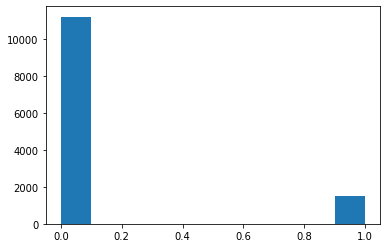

In [25]:
plt.hist(ic)